In [1]:
import numpy as np
import utils 

# Caricamento dei datasets

In [2]:
#Carico i datasets
audio_files_target = utils.load_dataset('Dataset/Target')
audio_files_nonTarget = utils.load_dataset('Dataset/Non-Target')   

# Estrazione delle frequenze di campionamento e plot delle stesse

Caricamento dataset nel dataframe

In [2]:
df_paths, df_names = utils.create_dataframe_from_files("Dataset")

In [3]:
df_paths, df_names

(                                               FilePath
 0     Dataset/Target/Acoustic Harassment Devices/AHD...
 1            Dataset/Target/Tug/20171128c-28_190038.wav
 2            Dataset/Target/Tug/20171227a-66_110853.wav
 3            Dataset/Target/Tug/20171127a-24_105442.wav
 4                 Dataset/Target/Tug/20171210-49_49.wav
 ...                                                 ...
 2658  Dataset/Non-Target/Fin, Finback Whale/6104700F...
 2659  Dataset/Non-Target/Fin, Finback Whale/61064009...
 2660  Dataset/Non-Target/Fin, Finback Whale/6106400O...
 2661  Dataset/Non-Target/Fin, Finback Whale/SanctSou...
 2662  Dataset/Non-Target/Red grouper/SanctSound_FK03...
 
 [2663 rows x 1 columns],
                                                FileName
 0                                        AHD_Airmar.wav
 1                               20171128c-28_190038.wav
 2                               20171227a-66_110853.wav
 3                               20171127a-24_105442.wav
 4 

# Ricerca ed eliminazione dei duplicati

In [4]:
duplicate_indices = utils.find_duplicates(df_names)
print(duplicate_indices)

{'72021005.wav': [681, 2520], '7202100T.wav': [680, 2519], '7202100V.wav': [676, 2518], '7202100Z.wav': [707, 2527], '7702800U.wav': [1377, 2349], '7702800V.wav': [1384, 2358], '7702800X.wav': [1422, 2402], '7702801F.wav': [1379, 2351], '7702801M.wav': [1410, 2395], '78018002.wav': [702, 2525], '78018003.wav': [701, 2524], '7801800B.wav': [692, 2523], '7801800D.wav': [703, 2526], '7801800H.wav': [682, 2521], '7801800J.wav': [675, 2517], '84016002.wav': [2235, 2392], '8401600B.wav': [2251, 2399], '84021003.wav': [2342, 2429], '91012009.wav': [1875, 2368], '9101200B.wav': [1893, 2393], '9101200K.wav': [1871, 2361], '9101201E.wav': [1886, 2388], '91012022.wav': [1877, 2382], '91012048.wav': [1907, 2417], '91012049.wav': [1908, 2418]}


Salvataggio del dizionario in un file json

In [5]:
import json

# Convert the dictionary to a JSON string
duplicate_indices_json = json.dumps(duplicate_indices)

# Write the JSON string to a file
with open('Dataset/duplicate_indices.json', 'w') as f:
    f.write(duplicate_indices_json)

# Eliminazione duplicati

In [6]:
# Remove the duplicate rows
df_paths, df_names = utils.remove_rows(df_paths, df_names, 'Dataset/duplicate.txt', 'Dataset/df_paths.csv', 'Dataset/df_names.csv')

In [7]:
df_names, df_paths

(                                               FileName
 0                                        AHD_Airmar.wav
 1                               20171128c-28_190038.wav
 2                               20171227a-66_110853.wav
 3                               20171127a-24_105442.wav
 4                                    20171210-49_49.wav
 ...                                                 ...
 2658                                       6104700F.wav
 2659                                       61064009.wav
 2660                                       6106400O.wav
 2661   SanctSound_SB03_05_finwhale_20190923T074930Z.wav
 2662  SanctSound_FK03_01_redgrouper_20190201T054658Z...
 
 [2636 rows x 1 columns],
                                                FilePath
 0     Dataset/Target/Acoustic Harassment Devices/AHD...
 1            Dataset/Target/Tug/20171128c-28_190038.wav
 2            Dataset/Target/Tug/20171227a-66_110853.wav
 3            Dataset/Target/Tug/20171127a-24_105442.wav
 4 

In [10]:
#TODO: dirgli di aggiornare il file di metadata, ci sono 1973 file su 2638
#TODO: Vedere la frequenza massima di ogni audio,analisi canali e bitrate, e controllare il contenuto di tali frequenze e decidere se continuare ad abbassare il range di frequenze. Cercare di ridurre il più possibile. Secondo benedetto 192Khz.  

# Estrazione delle durate degli audio e plot della distribuzione delle stesse

In [2]:
audio_durations = utils.extract_durations('Dataset/df_paths.csv')

In [3]:
audio_durations

[31.207619047619048,
 31.207619047619048,
 31.207619047619048,
 31.207619047619048,
 31.207619047619048,
 20.0,
 9.99297052154195,
 8.668526077097505,
 10.29297052154195,
 9.993015873015873,
 19.993015873015874,
 37.24267573696145,
 5.0,
 11.00625850340136,
 3.527995444191344,
 3.527995444191344,
 3.527995444191344,
 1.763986332574032,
 1.763986332574032,
 1.763986332574032,
 3.527995444191344,
 2.646013667425968,
 3.527995444191344,
 1.2227062706270626,
 1.5207920792079208,
 1.2324752475247525,
 1.116831683168317,
 1.1664686468646865,
 1.4574257425742574,
 1.0967656765676568,
 1.7937293729372936,
 1.4621782178217821,
 0.8645544554455445,
 0.9821782178217822,
 1.8723267326732673,
 1.33016501650165,
 1.3526072607260726,
 1.451089108910891,
 58.62316831683168,
 1.9211875,
 1.7978125,
 1.6121875,
 1.665125,
 1.682425,
 1.551,
 1.3395,
 1.4241,
 1.5369,
 1.2408,
 1.5792,
 1.4382,
 1.7907,
 1.692,
 1.2549,
 1.1421,
 1.4946,
 1.3677,
 1.3959,
 1.6074,
 1.5087,
 1.3959,
 1.3113,
 1.4382,
 1.2

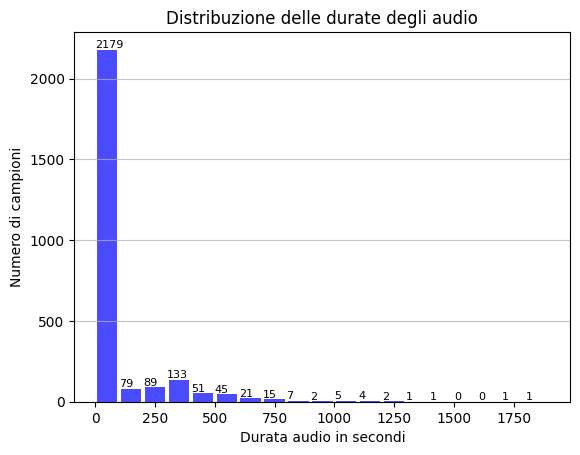

In [4]:
utils.plot_durations(audio_durations)

Il trim andrebbe fatto intorno ai 750 secondi? La maggior parte dei campioni è distribuita entro quel valore

# Analisi delle frequenze

2000 200000
600 384000


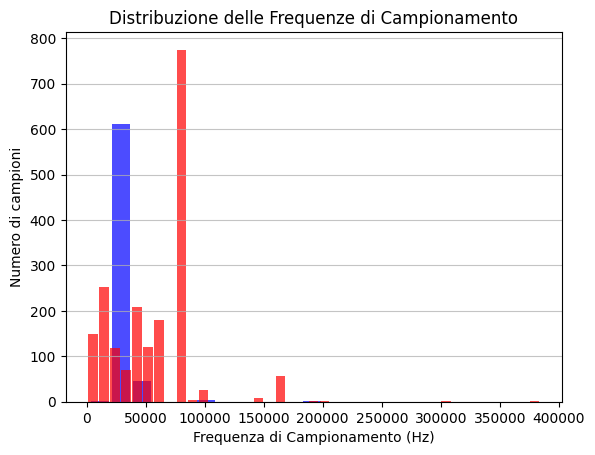

In [7]:
#TODO: analisi per il resembling shannon Nyquist 
#TODO: da modificare --> non prendere i duplicati 
frequenciesTarget,frequenciesNonTarget = utils.get_frequencies('Dataset/df_paths.csv')
    
min = np.min(frequenciesTarget)
max = np.max(frequenciesTarget)

print(min, max)

min = np.min(frequenciesNonTarget)
max = np.max(frequenciesNonTarget)

print(min, max)

utils.plotFrequencies(frequenciesTarget,frequenciesNonTarget)

In [4]:
audio_files = utils.get_audio_files('Dataset/df_paths.csv')

Promemoria: gli audio troppo corti sono stati saltati. va bene come cosa? 

Skipping Dataset\Non-Target\Minke Whale\64103001.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103002.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103003.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103004.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103005.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103006.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103007.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103008.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103009.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\6410300A.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\6410300B.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64104001.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64104002.wav because it's too short
Skipping Dat

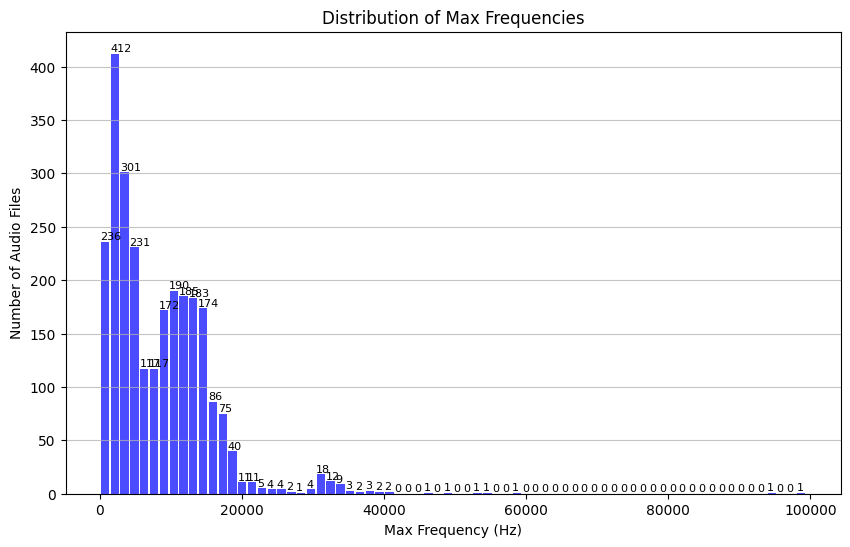

In [6]:
max_frequencies = utils.analyze_max_frequencies(audio_files)
utils.plot_max_frequencies(max_frequencies)

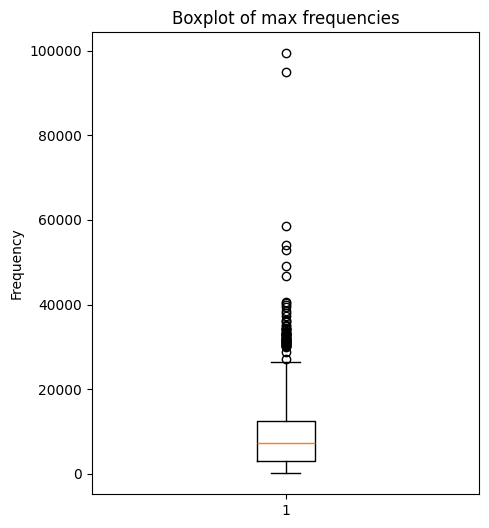

In [16]:
utils.boxplot_max_frequencies(max_frequencies)

Files with 2 channels:
Dataset/Target/Acoustic Harassment Devices/AHD_Airmar.wav
Dataset/Target/Cargo/Cargo-Ship-at-20-knts.wav
Dataset/Target/Passengership/1cc5583b-fe72-4cb2-b64c-563bd87ad91b.mp3
Dataset/Target/Underwater Communication Signals/HLF-5-Active-Sonar.wav
Dataset/Target/Underwater Communication Signals/M-Sequence-communication-sonar.wav
Dataset/Target/Sonar/LFA-Sonar-Simulation.wav
Dataset/Target/Seismic airguns surveys/airguns.mp3
Dataset/Target/Seismic airguns surveys/Airgun-and-Echosounders.wav
Dataset/Target/Vessel/ship_small.mp3
Dataset/Target/Vessel/rhb_arrival.mp3
Dataset/Target/Vessel/Merchant-Ship-passing-at-1-mile.wav
Dataset/Target/Seafloor fossil fuel processing/SeaFloorProcessing.wav
Dataset/Non-Target/Black Drum/Black-Drum.wav
Dataset/Non-Target/Atlantic croaker/Croaker.wav
Dataset/Non-Target/Bearded Seal/Bearded_Seal.wav
Dataset/Non-Target/Perch/SeaPerch.wav
Dataset/Non-Target/Ringed Seal/Ringed-Seal-2.wav
Dataset/Non-Target/Northern fur seal/Ant-fur-seal-pu

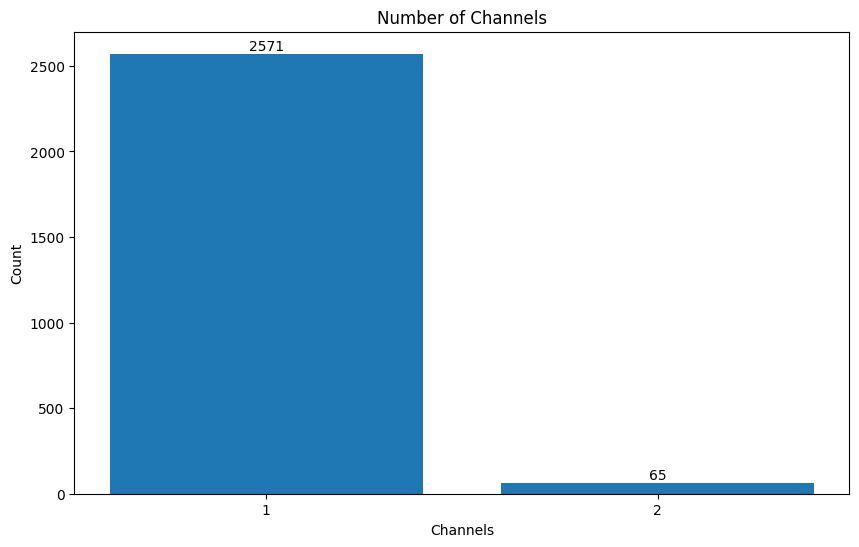

In [17]:
channels = utils.analyze_channels(audio_files)
utils.plot_channels(channels)

# Analisi dei Bit Depth

Could not process file Dataset/Non-Target/Grampus, Risso_s Dolphin/Grampus_griseus_risso-clicks.wav
Could not process file Dataset/Non-Target/Dwarf Sperm Whale/clicks-and-whistles-DSW_Rattelsnake-click-train.wav
Could not process file Dataset/Non-Target/Dwarf Sperm Whale/click-trains-DSW_tic-tocs-and-clicks.wav
Could not process file Dataset/Non-Target/Dwarf Sperm Whale/xzoom-whistle-2-DSW_whistles-and-slow-click-train.wav
Could not process file Dataset/Non-Target/Dwarf Sperm Whale/burst-pulse-DSW_bullfrog-click-train.wav
Could not process file Dataset/Non-Target/Dwarf Sperm Whale/multipart-stepping-tonal-DSW_downsweep-rattle.wav
Could not process file Dataset/Non-Target/Dwarf Sperm Whale/DSW_whistles-and-rattles.wav
Could not process file Dataset/Non-Target/Fraser_s Dolphin/Lagenodelphis_hosei_FR_down-sweep.wav
Could not process file Dataset/Non-Target/Fraser_s Dolphin/Lagenodelphis_hosei_FR_whistles.wav
Could not process file Dataset/Non-Target/Fraser_s Dolphin/Lagenodelphis_hosei_FR

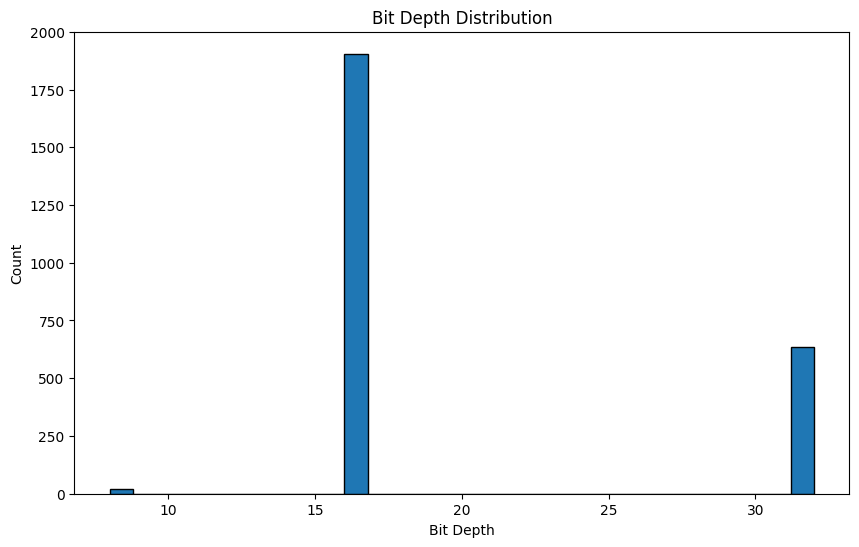

In [18]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import os

def analyze_and_plot_bit_depth(audio_files):
    bit_depths = []
    for file in audio_files:
        if file.lower().endswith('.mp3'):  # Ignora i file .mp3
            continue
        try:
            audio = AudioSegment.from_file(file)
            bit_depth = audio.sample_width * 8  # Convert sample width to bit depth
            bit_depths.append(bit_depth)
        except:
            print(f"Could not process file {file}")
            continue

    # Crea un plot a barre della distribuzione delle bit depth
    plt.figure(figsize=(10, 6))
    plt.hist(bit_depths, bins=30, edgecolor='black')
    plt.xlabel('Bit Depth')
    plt.ylabel('Count')
    plt.title('Bit Depth Distribution')
    plt.show()

# Utilizzo della funzione
audio_files = utils.get_audio_files('Dataset/df_paths.csv')
analyze_and_plot_bit_depth(audio_files)

# Analisi sulla distribuzione delle classi

In [9]:
import pandas as pd
import os

# Carica il DataFrame da df_paths.csv
# df_paths = pd.read_csv('Dataset/df_paths.csv', header=None, names=['path'])

# Crea una copia del DataFrame originale
df_paths_copy = df_paths.copy()

# Estrai la classe e il target dai percorsi dei file
df_paths_copy['class'] = df_paths_copy['FilePath'].apply(lambda path: os.path.basename(os.path.dirname(path)))
df_paths_copy['target'] = df_paths_copy['FilePath'].apply(lambda path: os.path.basename(os.path.dirname(os.path.dirname(path))))

# Ora il DataFrame df_paths_copy contiene le nuove colonne 'class' e 'target'

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_class_distribution(df, class_column):
    # Calcola la distribuzione delle classi
    class_distribution = df[class_column].value_counts()

    # Crea un plot a barre della distribuzione delle classi
    plt.figure(figsize=(30, 10))
    class_distribution.plot(kind='bar')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()

In [49]:
import matplotlib.pyplot as plt

def plot_class_distribution_horizontal(df, class_column):
    # Calculate the class distribution
    class_distribution = df[class_column].value_counts()

    # Sort the class distribution in descending order
    class_distribution = class_distribution.sort_values(ascending=True)

    # Create a horizontal bar plot of the class distribution
    plt.figure(figsize=(10, 30))

    # Color the bars based on the class
    # bar_colors = ['red' if x == 'Target' else 'blue' for x in class_distribution.index]

    class_distribution.plot(kind='barh',  width=0.8)  # Increase the width of the bars

    # Add the count of instances next to each bar, aligned vertically in the center
    for index, value in enumerate(class_distribution):
        plt.text(value + 1, index, str(value), va='center')

    plt.xlabel('Count')
    plt.ylabel('Class')
    plt.title('Class Distribution')
    plt.show()

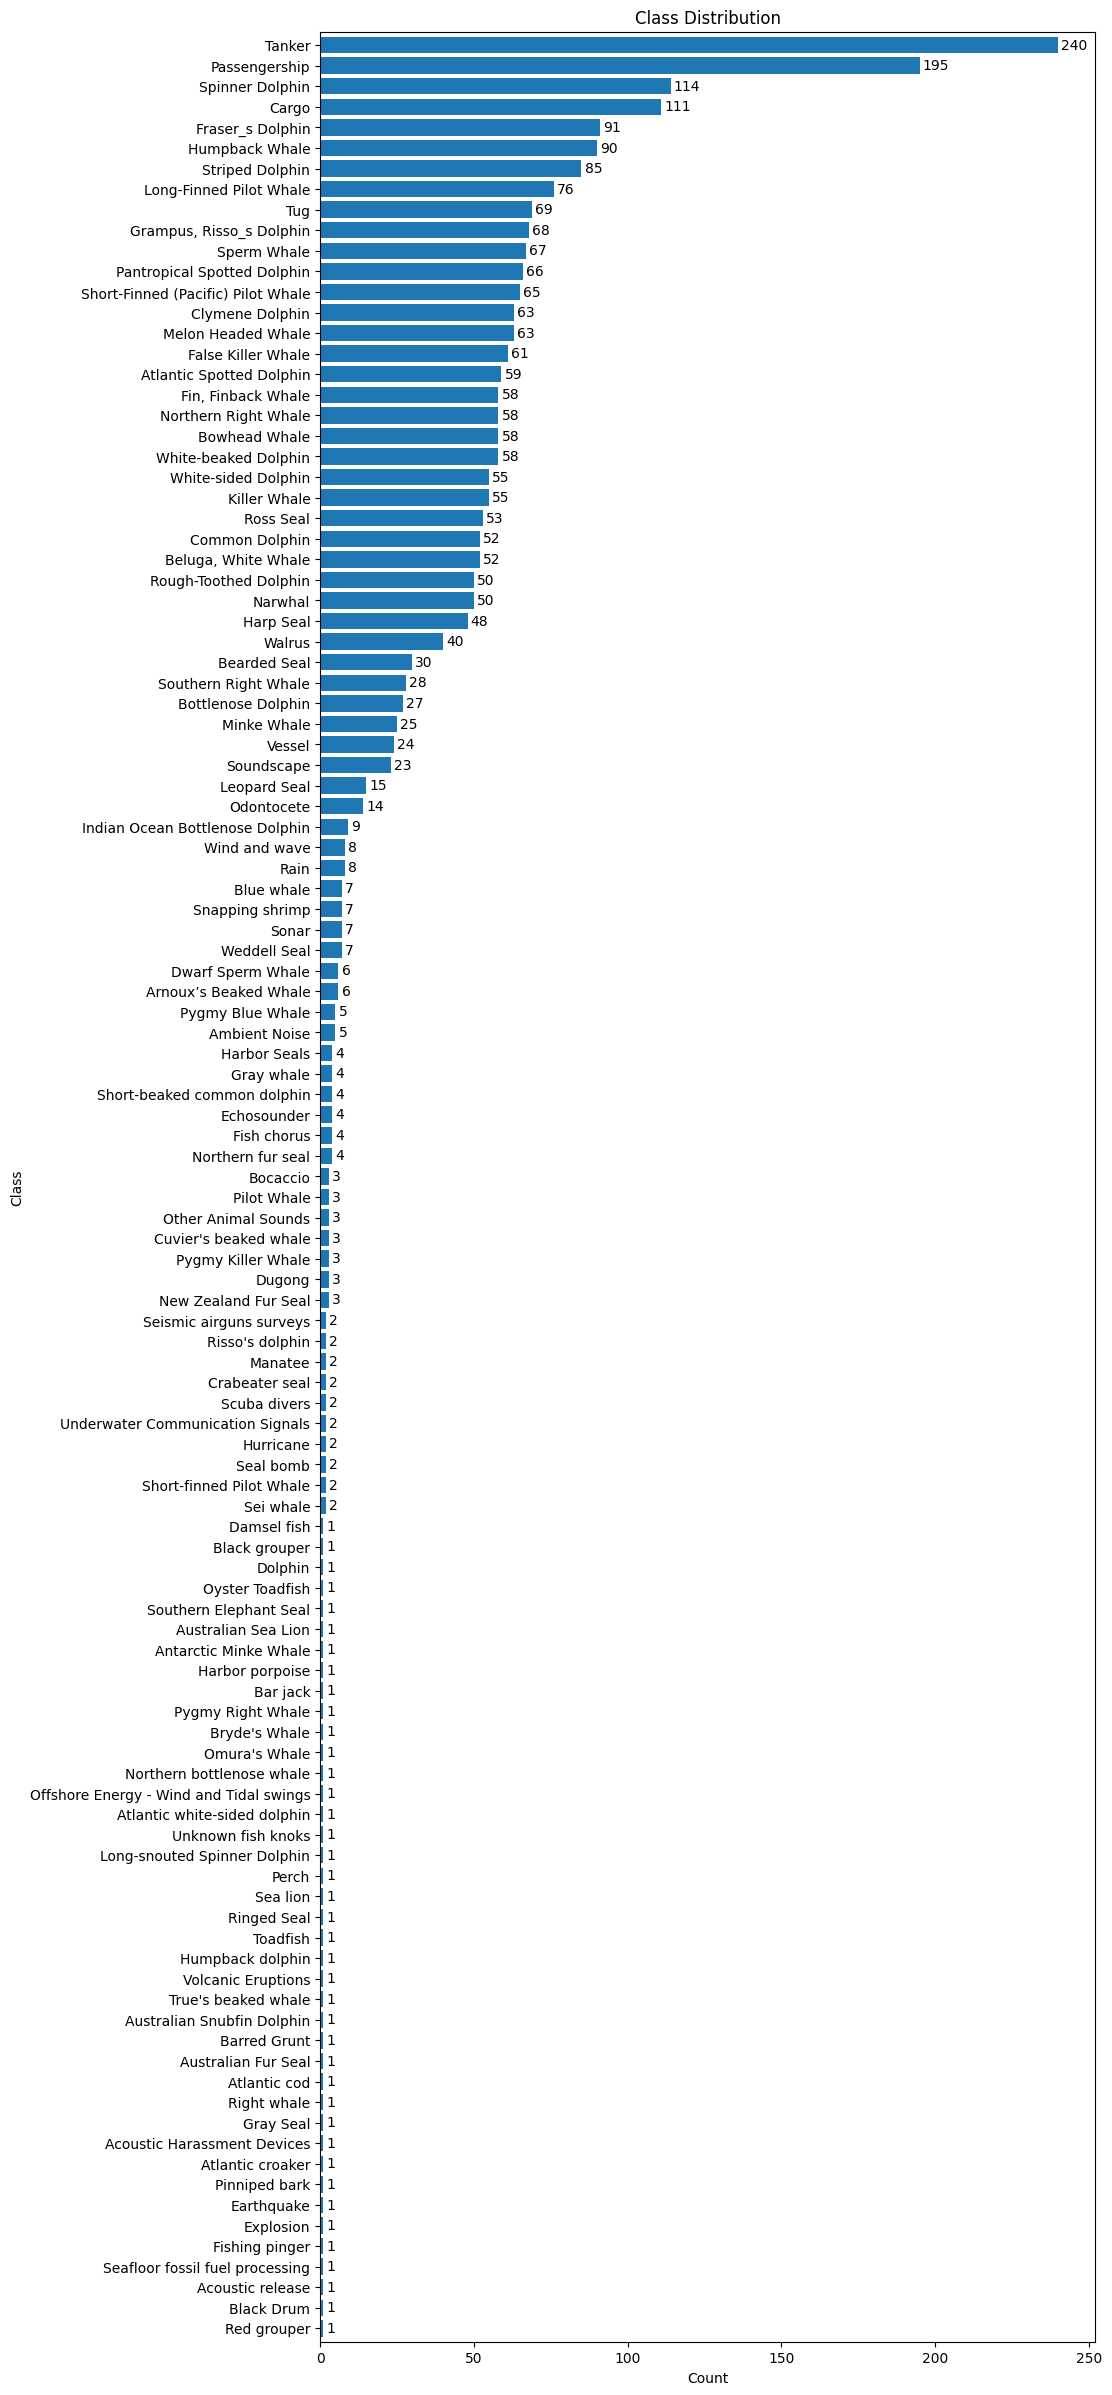

In [50]:
plot_class_distribution_horizontal(df_paths_copy, 'class')

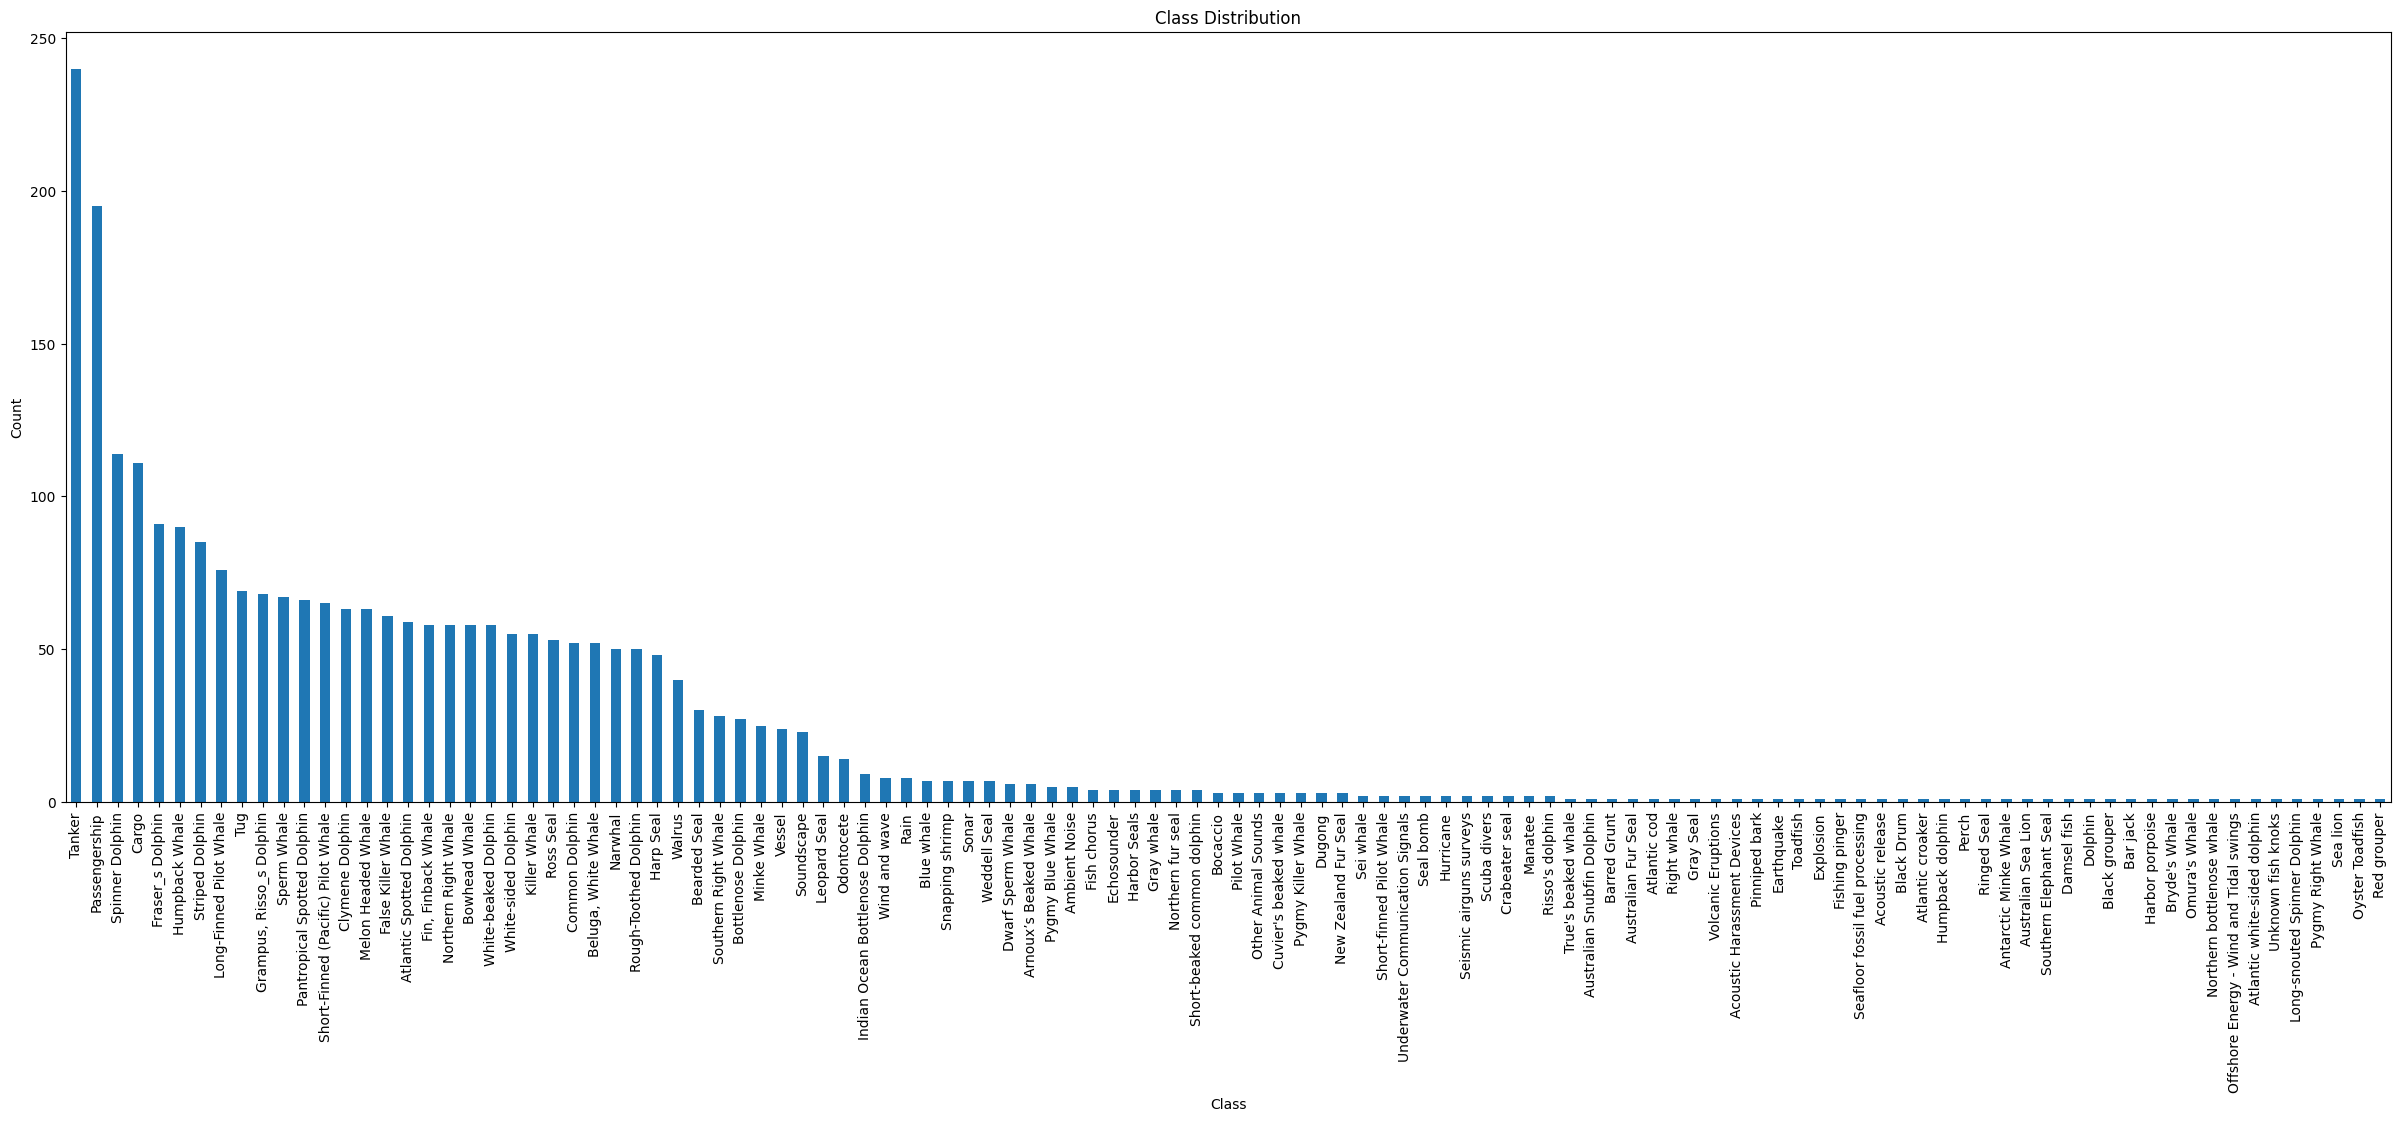

In [51]:
plot_class_distribution(df_paths_copy, 'class')